Gensim is a free to use python library. It provides APIs to solve various problems relating to natural language processing. It is fast, scalable and robust.

In this practice exercise we will train our own Word2Vec model using gensim Word2Vec API. Objectives of this practice exercise are, 


1.   Train your word2vec word embedding model.
2.   Visualize trained word embedding model using principal component analysis.


First step will be to load the corpus, clean it and tokenize it.

Libraries used in this notebook along with their version:

google	2.0.3

matplotlib	3.2.1

numpy	1.18.3

pandas	1.0.3

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from nltk.tokenize import RegexpTokenizer
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import re

We will employ a text categorization dataset based on BBC articles. Each article is assigned a specific captegory. 
###Implement the code to load the dataset.(Hint: Use the pandas library to load the csv file.)

In [0]:
# Solution
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Module 3 Mentor deck - NLP/Module 3 Week 2 Mentor deck NLP/case study/bbc-text.csv')

In [4]:
# Sanity check: Your output should look like the below
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


###Create a function called "complaint_to_words" to convert each consumer complaint narrative to individual tokens.(Hint: Use regular expression based tokenizer.)

In [0]:
# Solution
def complaint_to_words(comp):
    
    words = RegexpTokenizer('\w+').tokenize(comp)
    words = [re.sub(r'\d+', '', w).lower() for w in words]
    words = list(filter(lambda a: a != '', words))
    
    return words

We will use the above function here to create a list of list that will store each complaint tokenized into separate words.

In [0]:
data_list = list()
for comp in df['text']:
    sentence = np.zeros(300)
    count = 0
    data_list.append(complaint_to_words(comp))

Next step is to import the Word2Vec model from gensim.

In [0]:
from gensim.models import Word2Vec

###Create your own model using the data_list defined above and gensim Word2Vec API. (Hint: https://radimrehurek.com/gensim/models/word2vec.html)

In [0]:
# Solution
model = Word2Vec(data_list, min_count=1, size=100)

In [9]:
# Loading the vectors for each word in varaible "x"
x = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


###Use PCA algorithm from sklearn to convert high dimesnional word embeddings to two diemnsions and save them in the variable "results".

In [0]:
# Solution
pca = PCA(n_components=2)
result = pca.fit_transform(x)

Visualizing the word embeddings.

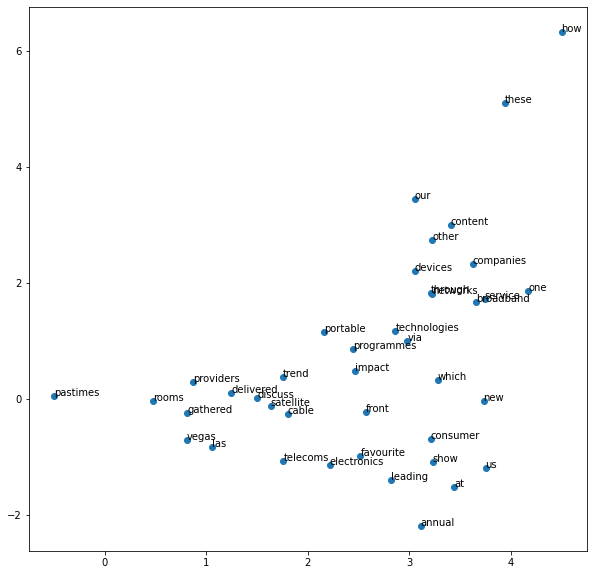

In [11]:
pyplot.figure(figsize = (10, 10))
pyplot.scatter(result[40:80, 0], result[40:80, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words[40:80]):
	pyplot.annotate(word, xy=(result[40 + i, 0], result[40 + i, 1]))
pyplot.show()